In [89]:
import re
import nltk
from statistics import mean 


def get_clean_text(title, folder):
    """Given a character name (title) and a folde in which to find it
    return the page markup as a neatly cleaned string.
    
    Input
    -----
        title : str
        folder : str
    
    Output
    ------
        text : str
        
    Example
    -------
        >>> get_clean_text('Iron Man', 'heroes')
    """
    # Load markup
    with open(f"{folder}/{title}") as fp:
        text = fp.read()

    # Remove category links
    text = re.sub(r'\[\[Category.+\]\]', '', text)
    
    # Fix links (match and clear "[[Iron Man (comic book)|" and "[[", then on next line "]]"
    text = re.sub(r'(\[\[((?!\]\]).)+\|)|(\[\[)', '', text)
    text = re.sub(r'\]\]', '', text)
    
    # Remove '''
    text = re.sub(r"'''", '', text)
    
    # Remove refs
    text = re.sub(r'<ref.+?</ref>', '', text)
    
    # Remove other ugly html links
    text = re.sub(r'<.+?>', '', text)
    
    # Remove '=' signs in headers
    text = re.sub(r'=+', '', text)
    
    # Remove table and external links
    text = re.sub(r'\{\{[\w\W]*?\}\}', '', text)
    
    # Remove everything after "See Also"
    text = re.sub(r'== ?See [aA]lso[\w\W]+', "", text)

    return text

In [90]:
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
import string

# Get list of stopwords and add a few
stop_words = set(stopwords.words('english'))

def get_clean_words(text, exclude_words=[]):
    """Given some text, return a list of clean words.
    
    Input
    -----
        text : str
        exclude_words : list
            Words to exclude (e.g. characters own name)
    
    Output
    ------
        words : list
        
    Example
    -------
        >>> my_text = get_clean_text('Iron Man', 'heroes')
        >>> my_words = get_clean_words(text, exclude_words=['Iron', 'Man'])
    """

    # Extarct words
    words = word_tokenize(text)
    
    # Add exclude words to words to give it same treatment
    words += exclude_words
    
    # Convert to lower case
    words = [w.lower() for w in words]
    
    # Clear punctuation
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]
    
    # Seperate words and exclude words
    if len(exclude_words) > 0:
        exclude_words = words[-len(exclude_words):]
        words = words[:-len(exclude_words)]
    
    # Remove non-alphabetic words
    words = [w for w in words if w.isalpha()]
    
    # Remove stop words
    words = [w for w in words if not w in stop_words | set(exclude_words)]
    
    # Remove single letter words 
    words = [w for w in words if len(w) > 1]

    return words

In [91]:
import os
import matplotlib.pylab as plt
from wordcloud import WordCloud, STOPWORDS


    
# wordcloud = WordCloud().generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [92]:
# lists of democrats and republicans

democrats = ['Jackson', 'Buren', 'Polk', 'Pierce', 'Buchanan', 'Johnson', 'Cleveland', 'Wilson', 'Roosevelt', 'Truman', 'Kennedy', 'LJohnson', 'Carter', 'Clinton', 'Obama']
             
republicans = ['Lincoln', 'Grant', 'Hayes', 'Garfield', 'Arthur', 'Harrison', 'McKinley', 'TRoosevelt', 'Taft', 'Harding', 'Coolidge', 'Hoover', 'Eisenhower', 'Nixon', 'Ford', 'Reagan', 'HBush', 'Bush', 'Trump']


             

In [201]:
import nltk
import numpy as np
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid_obj = SentimentIntensityAnalyzer()

pos_scores = []
neg_scores = []
neu_scores = []
comp_scores = []

pos_dem = []
years_dem = []

pos_rep = []
years_rep = []

neg_dem = []

neg_rep = []

words_dem = []
words_rep = []

years = [] # tracks years for x-axis

total_sotu_words = []
text_dem = ""
text_rep = ""
total_text = ""
for sotu in os.listdir("sotu"):
    if sotu.endswith(".txt"):
        name = sotu[0:-9]
        year = int(sotu[-8:-4])
        sotu_text = get_clean_text(sotu, "sotu")
        total_text += sotu_text
        sotu_words = get_clean_words(sotu_text)
        for word in sotu_words:
            total_sotu_words.append(word)
        sentiment = sid_obj.polarity_scores(sotu_text)
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        compound = sentiment['compound']
        pos_scores.append(pos)
        neg_scores.append(neg)
        neu_scores.append(neu)
        comp_scores.append(compound)
        years.append(year)
        
        # split dems and repubs
        if name in democrats:
            years_dem.append(year)
            pos_dem.append(pos)
            neg_dem.append(neg)
            for word in sotu_words:
                words_dem.append(word)
            text_dem += sotu_text
            
        if name in republicans:
            years_rep.append(year)
            pos_rep.append(pos)
            neg_rep.append(neg)
            for word in sotu_words:
                words_rep.append(word)
            text_rep += sotu_text

Dem mean: 0.1633913043478261
Rep mean: 0.1707752808988764


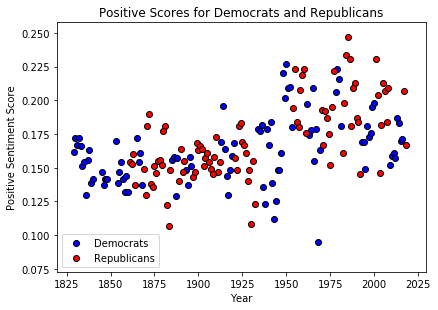

In [299]:
dems_pos_time = plt.scatter(years_dem, pos_dem, c='blue', edgecolors = 'black', label='Democrats')
reps_pos_time = plt.scatter(years_rep, pos_rep, c='red', edgecolors = 'black', label='Republicans')
plt.tight_layout()
plt.title('Positive Scores for Democrats and Republicans')
plt.xlabel('Year')
plt.ylabel('Positive Sentiment Score')
plt.legend(loc='lower left')

print('Dem mean:', mean(pos_dem))
print('Rep mean:', mean(pos_rep))


Dem mean: 0.07856521739130434
Rep mean: 0.07208988764044943


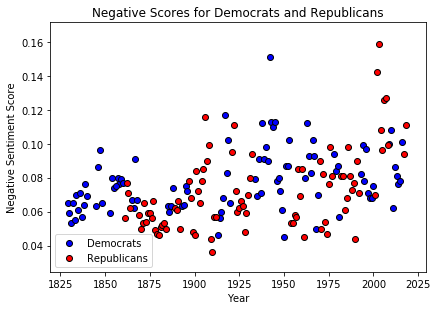

In [300]:
dems_neg_time = plt.scatter(years_dem, neg_dem, c='blue', edgecolors = 'black', label='Democrats')
reps_neg_time = plt.scatter(years_rep, neg_rep, c='red', edgecolors = 'black', label='Republicans')
plt.tight_layout()
plt.title('Negative Scores for Democrats and Republicans')
plt.xlabel('Year')
plt.ylabel('Negative Sentiment Score')
plt.legend(loc='lower left')

print('Dem mean:', mean(neg_dem))
print('Rep mean:', mean(neg_rep))


2003
1942
1943


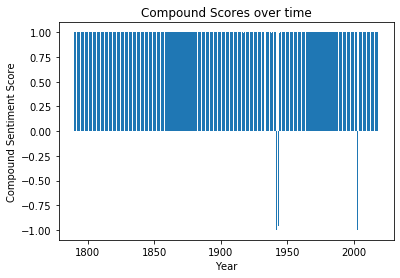

In [298]:
compound_time = plt.bar(years, comp_scores)

for index in range(len(comp_scores)):
    if comp_scores[index] <= -0.05:
        print(years[index])
    if comp_scores[index] >= -0.05 and comp_scores[index] <= 0.05:
        print('neutral', years[index])


compound_time = plt.title("Compound Scores over time")
compound_time = plt.xlabel("Year")
compount_time = plt.ylabel("Compound Sentiment Score")

0.16544298245614036


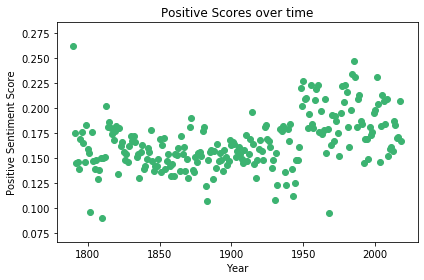

In [293]:
pos_time = plt.scatter(years, pos_scores, c='mediumseagreen')

pos_time = plt.title("Positive Scores over time")
pos_time = plt.xlabel("Year")
pos_time = plt.ylabel("Positive Sentiment Score")
plt.tight_layout()
print(mean(pos_scores))

0.07226754385964912


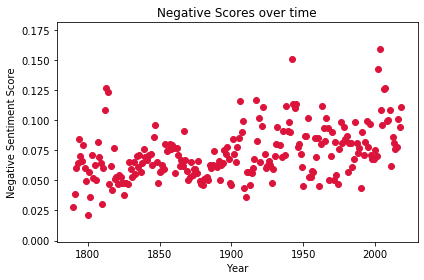

In [294]:
neg_time = plt.scatter(years, neg_scores, c='crimson')

neg_time = plt.title("Negative Scores over time")
neg_time = plt.xlabel("Year")
neg_time = plt.ylabel("Negative Sentiment Score")

plt.tight_layout()
print(mean(neg_scores))

1790
1810
0.16544298245614036
1810


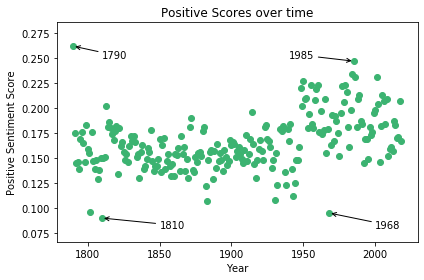

In [219]:
pos_time = plt.scatter(years, pos_scores, c='mediumseagreen')

pos_time = plt.title("Positive Scores over time")
pos_time = plt.xlabel("Year")
pos_time = plt.ylabel("Positive Sentiment Score")

max_index_pos = pos_scores.index(max(pos_scores))
max_year_pos = years[max_index_pos]
print(max_year_pos)

min_index_pos = pos_scores.index(min(pos_scores))
min_year_pos = years[min_index_pos]
print(min_year_pos)

avg_pos = mean(pos_scores)
print(avg_pos)

# show outliers

score_1790 = pos_scores[years.index(1790)]

plt.annotate('1790', xy=(1790, score_1790), xytext=(1810, .250), arrowprops=dict(facecolor='black', arrowstyle='->'))

score_1985 = pos_scores[years.index(1985)]

score_1810 = pos_scores[years.index(1810)]

print(years[pos_scores.index(0.09)])

score_1968 = pos_scores[years.index(1968)]

plt.annotate('1985', xy=(1985, score_1985), xytext=(1940, .250), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1810', xy=(1810, score_1810), xytext=(1850, .08), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1968', xy=(1968, score_1968), xytext=(2000, .08), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()

Text(1970, 0.125, '1942')

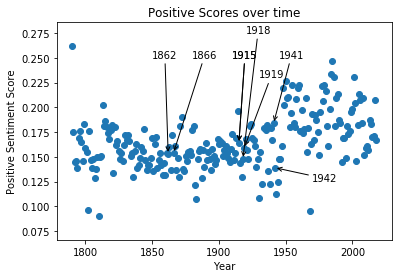

In [192]:
# WARS

pos_time = plt.scatter(years, pos_scores)

pos_time = plt.title("Positive Scores over time")
pos_time = plt.xlabel("Year")
pos_time = plt.ylabel("Positive Sentiment Score")

# beginning of civil war
score_1862 = pos_scores[years.index(1862)]

# end of civil war
score_1866 = pos_scores[years.index(1866)]

# before US in WW2
score_1941 = pos_scores[years.index(1941)]
# print(score_1941)

# beginning of US involvement in WW2
score_1942 = pos_scores[years.index(1942)]

# beginning of WW1
score_1915 = pos_scores[years.index(1915)]

# end of WW2, but beginning of 1918 flu
score_1918 = pos_scores[years.index(1918)]
# print(score_1918)

score_1919 = pos_scores[years.index(1919)]
# print(score_1919)

plt.annotate('1862', xy=(1862, score_1862), xytext=(1850, .250), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1866', xy=(1866, score_1866), xytext=(1880, .250), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1915', xy=(1915, score_1915), xytext=(1910, .250), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1915', xy=(1915, score_1915), xytext=(1910, .250), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1918', xy=(1918, score_1918), xytext=(1920, .275), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1919', xy=(1919, score_1919), xytext=(1930, .23), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1941', xy=(1941, score_1941), xytext=(1945, .250), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1942', xy=(1942, score_1942), xytext=(1970, .125), arrowprops=dict(facecolor='black', arrowstyle='->'))


# for year in [1862, 1866]:
#     score_year = pos_scores[years.index(year)]
#     plt.annotate(str(year), xy=(year, score_year), xytext=(50, 100), textcoords = 'offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))


Text(2010, 0.275, '2010')

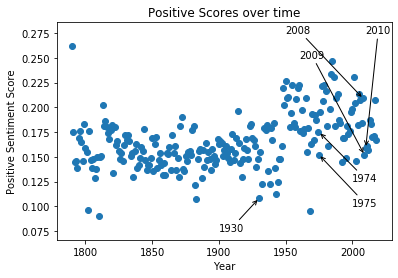

In [205]:
# RECESSIONS

pos_time = plt.scatter(years, pos_scores)

pos_time = plt.title("Positive Scores over time")
pos_time = plt.xlabel("Year")
pos_time = plt.ylabel("Positive Sentiment Score")

# beginning of the great depression
score_1930 = pos_scores[years.index(1930)]

# beginning and end of 70s recession
score_1974 = pos_scores[years.index(1974)]
# print(score_1974)

score_1975 = pos_scores[years.index(1975)]
# print(score_1975)

score_1976 = pos_scores[years.index(1976)]
# print(score_1976)

# beginning and end of 2008 recession
score_2008 = pos_scores[years.index(2008)]

score_2009 = pos_scores[years.index(2009)]

score_2010 = pos_scores[years.index(2010)]

plt.annotate('1974', xy=(1975, score_1974), xytext=(2000, .125), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1975', xy=(1975, score_1975), xytext=(2000, .1), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1930', xy=(1930, score_1930), xytext=(1900, .075), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('2008', xy=(2008, score_2008), xytext=(1950, .275), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('2009', xy=(2009, score_2009), xytext=(1960, .25), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('2010', xy=(2010, score_2010), xytext=(2010, .275), arrowprops=dict(facecolor='black', arrowstyle='->'))



0.16580701754385965
0.1653216374269006


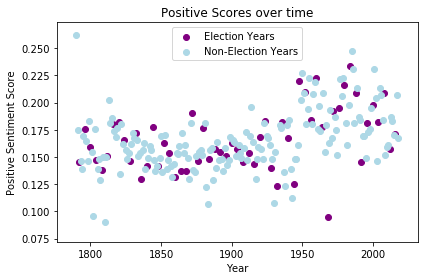

In [256]:
# election years
election_years = [1792, 1796, 1800, 1804, 1808, 1812, 1816, 1820, 1824, 1828, 1832, 1836, 1840, 1844, 1848, 1852, 1856, 1860, 1864, 1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

election_pos_scores = []
election_neg_scores = []
election_years_x = []

non_election_pos = []
non_election_neg = []
non_election_years = []

for index in range(len(years)):
    if years[index] in election_years:
        election_years_x.append(years[index])
        election_pos_scores.append(pos_scores[index])
        election_neg_scores.append(neg_scores[index])

    else:
        non_election_years.append(years[index])
        non_election_pos.append(pos_scores[index])
        non_election_neg.append(neg_scores[index])

pos_time_election = plt.scatter(election_years_x, election_pos_scores, c='purple', label = 'Election Years')
pos_time_no_election = plt.scatter(non_election_years, non_election_pos, c='lightblue', label = 'Non-Election Years')

pos_time = plt.title("Positive Scores over time")
pos_time = plt.xlabel("Year")
pos_time = plt.ylabel("Positive Sentiment Score")

plt.legend(loc='upper center')

election_avg_pos = mean(election_pos_scores)
non_election_avg_pos = mean(non_election_pos)

print(election_avg_pos)
print(non_election_avg_pos)

plt.tight_layout()
# almost no difference

0.0716140350877193
0.07248538011695907


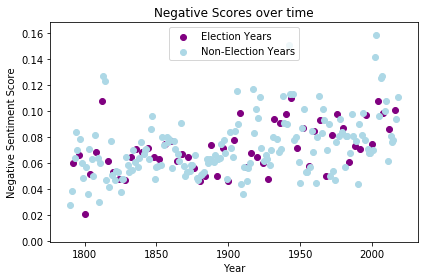

In [257]:
neg_time_election = plt.scatter(election_years_x, election_neg_scores, c='purple', label = 'Election Years')
neg_time_no_election = plt.scatter(non_election_years, non_election_neg, c='lightblue', label = 'Non-Election Years')

pos_time = plt.title("Negative Scores over time")
pos_time = plt.xlabel("Year")
pos_time = plt.ylabel("Negative Sentiment Score")

plt.legend(loc='upper center')

election_avg_neg = mean(election_neg_scores)
non_election_avg_neg = mean(non_election_neg)

print(election_avg_neg)
print(non_election_avg_neg)

plt.tight_layout()

2003
1800
0.127


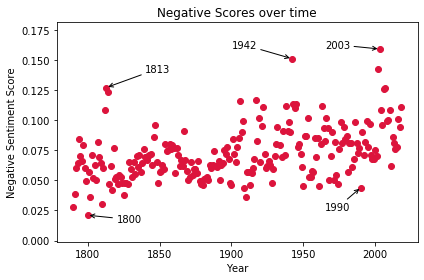

In [249]:
neg_time = plt.scatter(years, neg_scores, c='crimson')

neg_time = plt.title("Negative Scores over time")
neg_time = plt.xlabel("Year")
neg_time = plt.ylabel("Negative Sentiment Score")

max_index_neg = neg_scores.index(max(neg_scores))
max_year_neg = years[max_index_neg]
print(max_year_neg)

min_index_neg = neg_scores.index(min(neg_scores))
min_year_neg = years[min_index_neg]
print(min_year_neg)

score_1800 = neg_scores[years.index(1800)]

score_2003 = neg_scores[years.index(2003)]

score_1942 = neg_scores[years.index(1942)]

print(neg_scores[years.index(1813)])

score_1813 = neg_scores[years.index(1813)]

score_1990 = neg_scores[years.index(1990)]

plt.annotate('1800', xy=(1800, score_1800), xytext=(1820, .015), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('2003', xy=(2003, score_2003), xytext=(1965, .16), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1942', xy=(1942, score_1942), xytext=(1900, .16), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1813', xy=(1813, score_1813), xytext=(1840, .14), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('1990', xy=(1990, score_1990), xytext=(1965, .025), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()

In [258]:
from collections import Counter
dem_word_count = Counter(words_dem)
print(dem_word_count.most_common(10))

rep_word_count = Counter(words_rep)
print(rep_word_count.most_common(10))

[('government', 3085), ('states', 2911), ('congress', 2166), ('people', 2071), ('united', 2055), ('year', 1950), ('upon', 1775), ('would', 1712), ('must', 1622), ('country', 1539)]
[('government', 3065), ('states', 2523), ('congress', 2211), ('united', 1940), ('people', 1769), ('upon', 1692), ('year', 1594), ('would', 1592), ('must', 1478), ('great', 1456)]


In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b')
list_of_sotu = []
list_of_years = []
for sotu in os.listdir("sotu"):
    if sotu.endswith(".txt"):
        list_of_sotu.append(get_clean_text(sotu, 'sotu'))
        year = int(sotu[-8:-4])
        list_of_years.append(year)
response = vectorizer.fit_transform(list_of_sotu)

In [295]:
index_year = list_of_years.index(2003)

In [296]:
feature_array = np.array(vectorizer.get_feature_names())
# for col in response[index_year].nonzero()[1]:
#     print(feature_names[col], ' - ', response[0, col])
    
tfidf_sorting = np.argsort(response[index_year].toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]
for word in top_n:
    print(word)

saddam
hussein
weapons
iraq
inspectors
qaida
s
aids
people
america


slavery states congress states government states banks government salt soviet government government tariff government year year gold year jobs challenge america government states states government states government government bank states states states states new alliance poverty help vietnam vietnam billion tonight states states states states texas mexico mexico states industrial relief autocracy democracy government democracy world world hitler war war war dollars labor economic housing economic soviet world world nominees great submarines interstate war men unrest democracy 


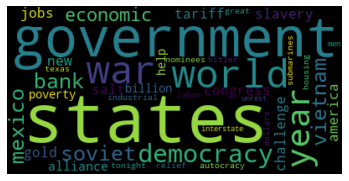

In [310]:
feature_array = np.array(vectorizer.get_feature_names())

top_words_dem = []
for year in years_dem:
    
    index_year = list_of_years.index(year)
    
    tfidf_sorting = np.argsort(response[index_year].toarray()).flatten()[::-1]

    n = 1
    top_n = feature_array[tfidf_sorting][:n]
    for word in top_n:
        top_words_dem.append(word)

top_text_dem = ''
for word in top_words_dem:
    if len(word) > 2:
        top_text_dem += word + " "
        
print(top_text_dem)
wordcloud = WordCloud().generate(top_text_dem)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

government chile government government budget afghanistan saddam iraq iraq america iraq iraq government nitrogen court government government government program federal program world world world world program oil federal energy states states states award congress congress states states conditions railway states states government cent coinage year congress government tonight government depression banks economic congress emancipation states states government states states government america government america government america programs america government government wool government great cable isthmus forest government government government interstate megan tonight 


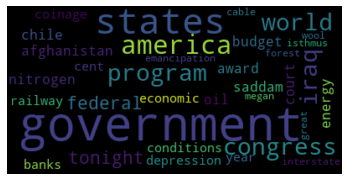

In [312]:
top_words_rep = []
for year in years_rep:
    
    index_year = list_of_years.index(year)
    
    tfidf_sorting = np.argsort(response[index_year].toarray()).flatten()[::-1]

    n = 1
    top_n = feature_array[tfidf_sorting][:n]
    for word in top_n:
        top_words_rep.append(word)
        
# top_words_rep = set(top_words_rep)
# top_words_rep = list(top_words_rep)
# for word in top_words_rep:
#     if len(word) > 2:
#         print(word)
        
        
top_text_rep = ''
for word in top_words_rep:
    if len(word) > 2:
        top_text_rep += word + " "
        
print(top_text_rep)
wordcloud = WordCloud().generate(top_text_rep)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
vectorizer_party = TfidfVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b')
party_response = vectorizer.fit_transform([text_dem, text_rep])
feature_array_party = np.array(vectorizer.get_feature_names())


In [287]:
tfidf_sorting_party = np.argsort(party_response[1].toarray()).flatten()[::-1]

n = 10
top_n = feature_array_party[tfidf_sorting_party][:n]
print(top_n)

['government' 'states' 'congress' 'united' 'year' 'people' 'american'
 'new' 'country' 's']


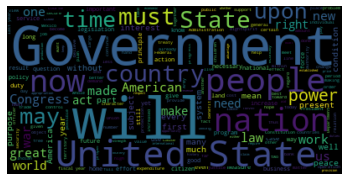

In [150]:
wordcloud = WordCloud().generate(text_dem)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

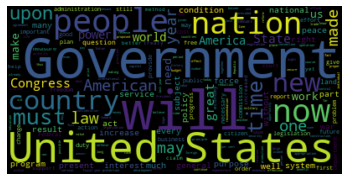

In [151]:
wordcloud = WordCloud().generate(text_rep)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

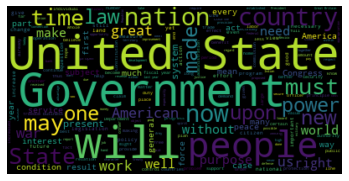

In [288]:
wordcloud = WordCloud().generate(total_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

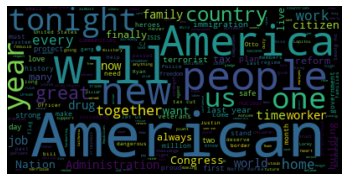

In [290]:
wordcloud = WordCloud().generate(get_clean_text("Trump_2018.txt", 'sotu'))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

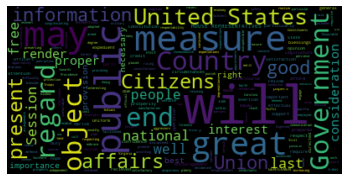

In [291]:
wordcloud = WordCloud().generate(get_clean_text("Washington_1790.txt", 'sotu'))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

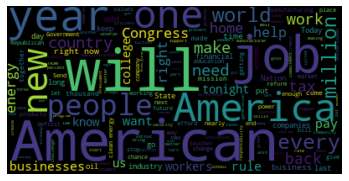

In [292]:
wordcloud = WordCloud().generate(get_clean_text("Obama_2012.txt", 'sotu'))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()